# Imports

In [161]:
import pandas as pd
import os
import numpy as np
from functools import reduce
import missingno as msno

### List Files

In [190]:
PATH='./data/'
arr = os.listdir(PATH)
arr = [i for i in arr if i not in '.ipynb_checkpoints']
print(arr)

['CAC40_composite.csv', 'DAX30_composite.csv', 'dowjones_composite.csv', 'eur_jpy.csv', 'hangseng_composite.csv', 'nasdaq_composite.csv', 'nikkei225_composite.csv', 'nyse_composite.csv', 's&p500_VIX.csv', 'usd_eur.csv', 'usd_jpy.csv']


### Create Dataframes

In [191]:
dataframes = []
for idx, val in enumerate(arr):
  value = val.replace("_composite","").replace(".csv","")
  result = pd.read_csv(f"{PATH}{val}")
  result.rename(columns={'Date': 'date'}, inplace=True)
#   try:
#     result = result.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
#   except:
#     pass
  for _val in [i for i in result.columns.tolist() if i not in 'date']:
    result.rename(columns={_val: f'{_val}_{value}'}, inplace=True)
#   result = result[[i for i in result.columns.tolist() if i not in ['']]]
  print(result.columns.tolist())
  dataframes.append(result)

['date', ' value_CAC40']
['date', ' value_DAX30']
['date', 'Open_dowjones', 'High_dowjones', 'Low_dowjones', 'Close_dowjones', 'Adj Close_dowjones', 'Volume_dowjones']
['date', 'Open_eur_jpy', 'High_eur_jpy', 'Low_eur_jpy', 'Close_eur_jpy', 'Adj Close_eur_jpy', 'Volume_eur_jpy']
['date', ' value_hangseng']
['date', 'Open_nasdaq', 'High_nasdaq', 'Low_nasdaq', 'Close_nasdaq', 'Adj Close_nasdaq', 'Volume_nasdaq']
['date', ' value_nikkei225']
['date', 'Open_nyse', 'High_nyse', 'Low_nyse', 'Close_nyse', 'Adj Close_nyse', 'Volume_nyse']
['date', ' value_s&p500_VIX']
['date', 'Open_usd_eur', 'High_usd_eur', 'Low_usd_eur', 'Close_usd_eur', 'Adj Close_usd_eur', 'Volume_usd_eur']
['date', 'Open_usd_jpy', 'High_usd_jpy', 'Low_usd_jpy', 'Close_usd_jpy', 'Adj Close_usd_jpy', 'Volume_usd_jpy']


### Outer Join on Date

In [192]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), dataframes)

In [193]:
for column in df.columns.tolist():
  if 'Close' in column:
    if 'dowjones' not in column:
      df=df.drop(column,axis=1)
for column in df.columns.tolist():
  if 'Close' in column:
    if 'Adj' not in column:
      df=df.drop(column,axis=1)

In [194]:
df.describe()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,Open_eur_jpy,High_eur_jpy,Low_eur_jpy,...,Volume_nyse,value_s&p500_VIX,Open_usd_eur,High_usd_eur,Low_usd_eur,Volume_usd_eur,Open_usd_jpy,High_usd_jpy,Low_usd_jpy,Volume_usd_jpy
count,7821.000000,7614.000000,10107.000000,10107.000000,10107.000000,10107.000000,1.010700e+04,4653.000000,4653.000000,4653.000000,...,1.386000e+04,7823.000000,4448.000000,4448.000000,4448.000000,4448.0,6282.000000,6282.000000,6282.000000,6282.0
mean,3837.585066,6226.590834,3132.852689,3163.194273,3102.310756,3133.582461,1.805920e+09,130.355973,130.918607,129.735538,...,1.193835e+09,19.479204,0.801152,0.804305,0.798135,0.0,108.509211,108.959928,108.010230,0.0
std,1311.851723,3427.922254,2423.894883,2441.614630,2406.026991,2424.192236,2.089188e+09,14.882542,14.906045,14.862562,...,1.816924e+09,8.110431,0.075708,0.076167,0.075594,0.0,13.505162,13.589601,13.413478,0.0
min,1441.000000,1322.700000,299.209991,302.279999,296.510010,299.440002,2.600000e+06,94.223999,95.000000,94.134003,...,0.000000e+00,9.140000,0.625710,0.629960,0.623900,0.0,75.750000,75.973999,75.570000,0.0
25%,2869.570100,3570.740075,1039.075012,1048.290039,1028.610046,1038.554993,1.863250e+08,121.410004,121.878998,120.842003,...,0.000000e+00,13.660000,0.743440,0.746182,0.740727,0.0,102.594997,103.081751,102.207752,0.0
50%,3944.909900,5754.260050,2858.449951,2895.370117,2823.290039,2858.219971,1.061900e+09,130.470001,130.940002,129.873993,...,0.000000e+00,17.470000,0.793620,0.797175,0.789830,0.0,109.737999,110.127998,109.339996,0.0
75%,4890.580100,8196.855000,4306.074951,4347.435058,4265.590088,4307.794922,3.350655e+09,137.248001,137.750000,136.753998,...,2.596448e+09,22.895000,0.867880,0.872228,0.865583,0.0,118.067499,118.598749,117.519997,0.0
max,6922.330100,14049.530000,10344.179688,10366.629883,10285.719727,10354.179688,8.873542e+10,169.453995,169.938995,169.119995,...,1.145623e+10,82.690000,0.962100,1.314800,0.959700,0.0,147.339996,147.630005,146.000000,0.0


#### View Null Values

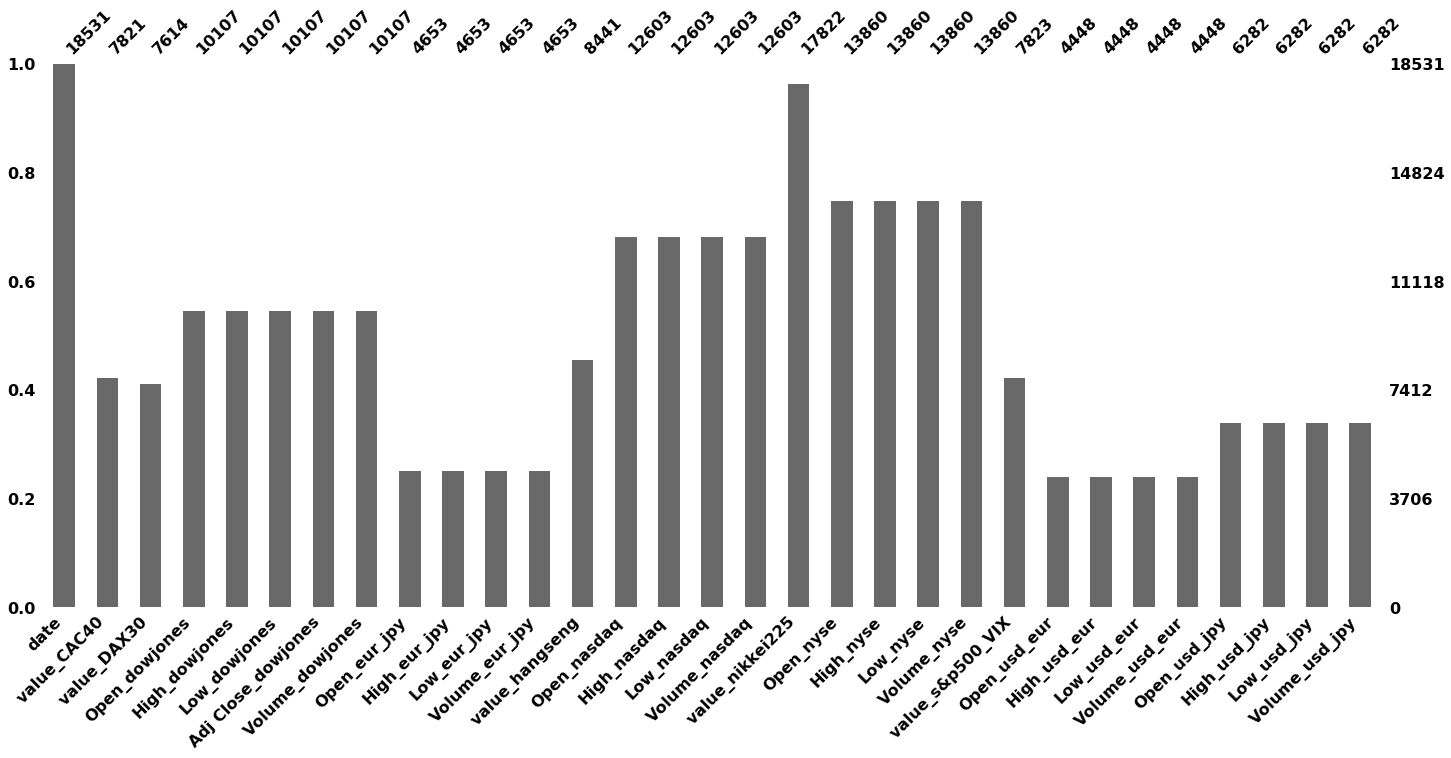

In [195]:
msno.bar(df)

### Impute missing values 

In [196]:
df['datetime'] = pd.to_datetime(df['date'])
# df.index = df['datetime']
df=df.drop('date',axis=1)

In [197]:
df=df.dropna(subset=['Adj Close_dowjones'])

In [198]:
df.tail()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,Open_eur_jpy,High_eur_jpy,Low_eur_jpy,...,value_s&p500_VIX,Open_usd_eur,High_usd_eur,Low_usd_eur,Volume_usd_eur,Open_usd_jpy,High_usd_jpy,Low_usd_jpy,Volume_usd_jpy,datetime
10278,NaN,NaN,8816.299805,8868.919922,8757.959961,8816.580078,2.997950e+09,125.832001,126.056000,125.739998,...,12.42,0.88932,0.88994,0.88780,0.0,111.908997,111.987000,111.884003,0.0,2019-04-22
10279,NaN,NaN,8836.990234,8892.959961,8726.669922,8751.330078,3.645850e+09,124.989998,125.217003,124.930000,...,14.80,0.89140,0.89171,0.88889,0.0,111.403999,111.543999,111.136002,0.0,2019-05-01
10280,NaN,NaN,9381.040039,9404.620117,9375.839844,9403.950195,2.160680e+09,121.341003,121.764000,121.334000,...,12.65,0.90130,0.90230,0.90050,0.0,109.373001,109.681999,109.366997,0.0,2019-12-26
10281,NaN,NaN,7792.959961,7792.959961,7580.649902,7650.629883,5.274310e+09,118.427002,118.447998,117.306999,...,41.17,0.91480,0.91797,0.91170,0.0,108.349998,108.371002,107.563004,0.0,2020-04-13
10282,NaN,NaN,7779.839844,7779.839844,7631.330078,7658.990234,4.753160e+09,117.442001,117.762001,117.022003,...,37.19,0.91368,0.91446,0.90775,0.0,107.305000,107.399002,106.610001,0.0,2020-05-01


In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [200]:
df=df.sort_values('datetime',ascending=True)

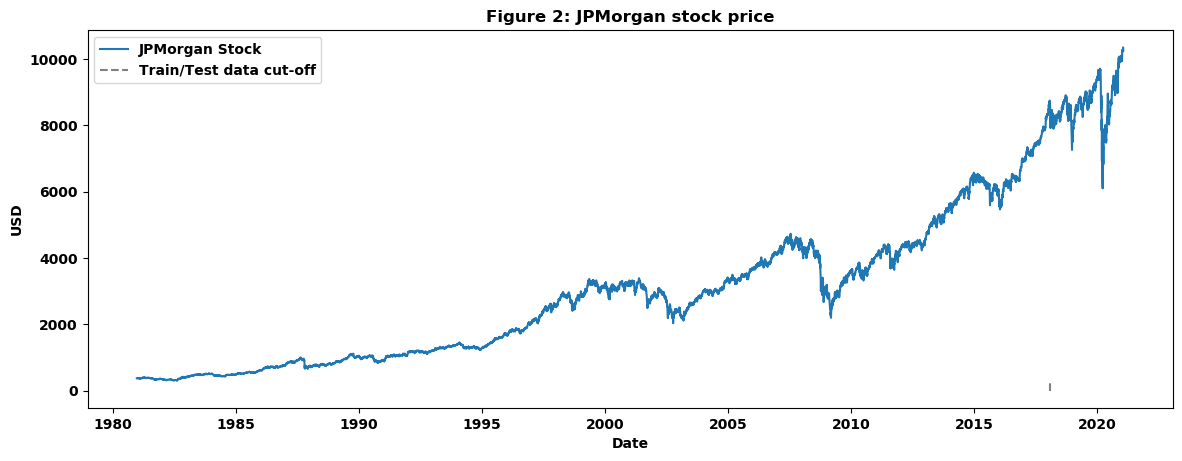

In [202]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.datetime, df['Adj Close_dowjones'], label='JPMorgan Stock')
plt.vlines(datetime.date(2018,1, 27), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: JPMorgan stock price')
plt.legend()
plt.show()

In [155]:
for val in df.columns.tolist():
  df[val]=df[val].interpolate()

In [120]:
df_interpol['readvalue'] = df_interpol['readvalue'].interpolate()
df_interpol.head(4)

KeyError: 'readvalue'

In [ ]:
value close 